In [39]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

from scipy import stats

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance

In [3]:
raw_data = pd.read_csv("data/immo_data.csv")

In [4]:
raw_data
# basic view of the data

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

In [5]:
raw_data.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10295.498789   -119.564046     35.626523           28.624516   
std     5941.973488      2.005033      2.139150           12.597980   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5178.750000   -121.790000     33.930000           18.000000   
50%    10263.500000   -118.490000     34.250000           29.000000   
75%    15438.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16336.000000  16512.000000  16512.000000   
mean    2644.170603      539.319540   1435.017260    501.135962   
std     2213.946369      425.207704   1158.151967    385.650673   
min        6.000000        2.000000      3.000000      2.000000   
25%     1446.000000      296.000000    788.000000    280.000000   
50%     2116.000000      435.000000   1168.000000    410.000000   
75%     3154.000000      647.000000   1738.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16512.000000        16512.000000  
mean        3.864091       206509.251453  
std         1.893244       115225.957661  
min         0.499900        14999.000000  
25%         2.562500       119400.000000  
50%         3.531300       179300.000000  
75%         4.733225       264500.000000  
max        15.000100       500001.000000

In [6]:
raw_data['Unnamed: 0'].nunique()

16512

In [7]:
raw_data['ocean_proximity'].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [8]:

# Create a mapping dictionary to map the string values to integers
mapping = {'INLAND': 0, '<1H OCEAN': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4}

# Use the replace method to replace the values in the 'ocean_proximity' column with the mapped integers
raw_data['ocean_proximity'] = raw_data['ocean_proximity'].replace(mapping)
raw_data

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  ocean_proximity  
0                 72000.0                0  
1                274100.0                1  
2                 58300.0                0  
3                200000.0                1  
4                117900.0                0  
...                   ...              ...  
16507             93800.0                0  
16508            103100.0                3  
16509            192600.0                0  
16510            153500.0                1  
16511             81100.0                2  

[16512 rows x 11 columns]

In [9]:
missing_values_count = raw_data.isnull().sum()
print(missing_values_count)

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
# how many total missing values do we have?
total_cells = np.product(raw_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

0.09689922480620156


In [11]:
columns = list(raw_data.columns)
columns

['Unnamed: 0',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

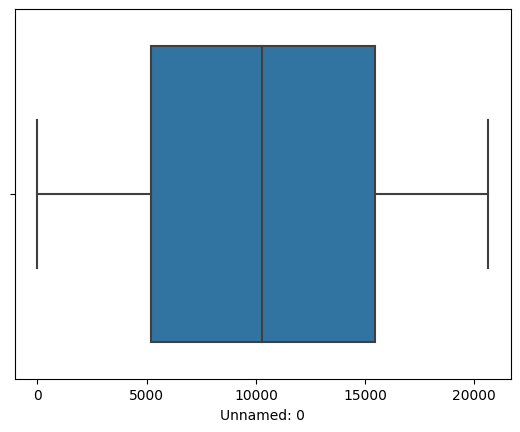

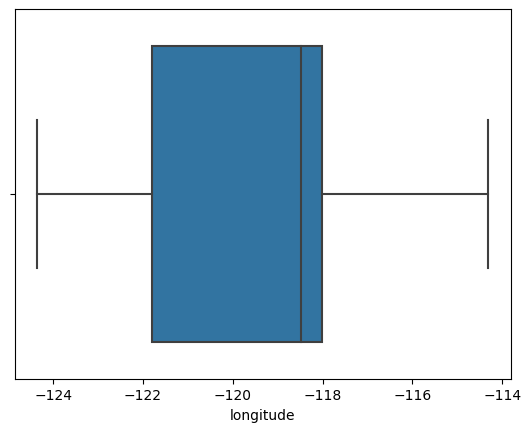

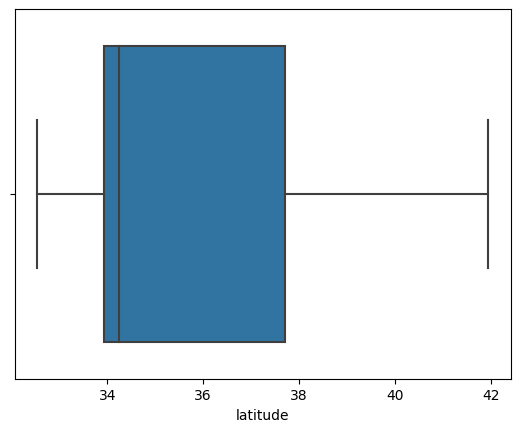

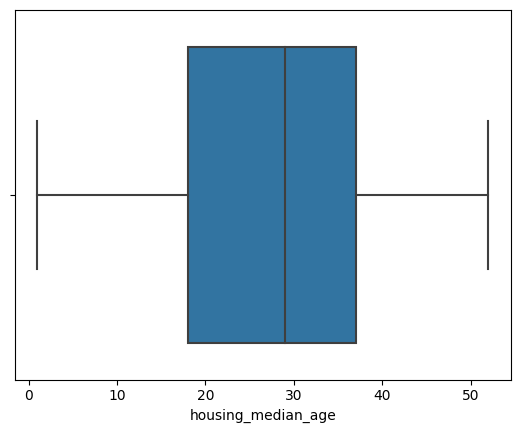

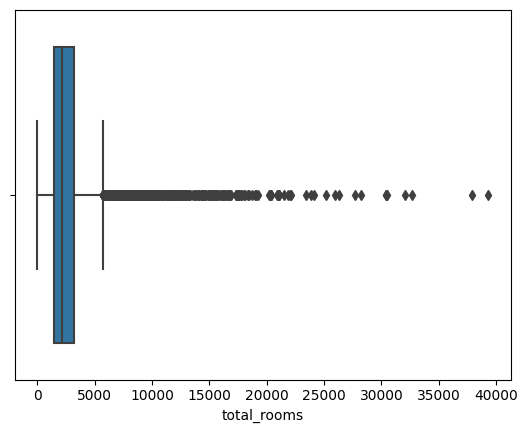

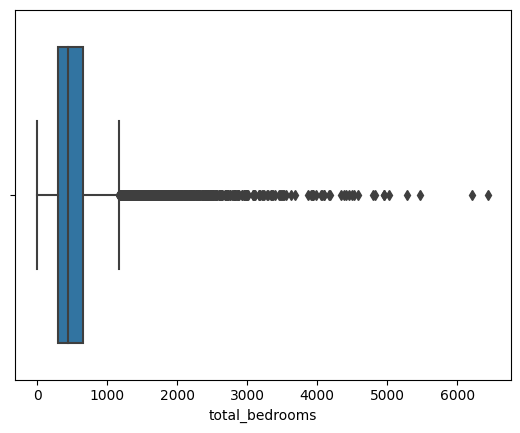

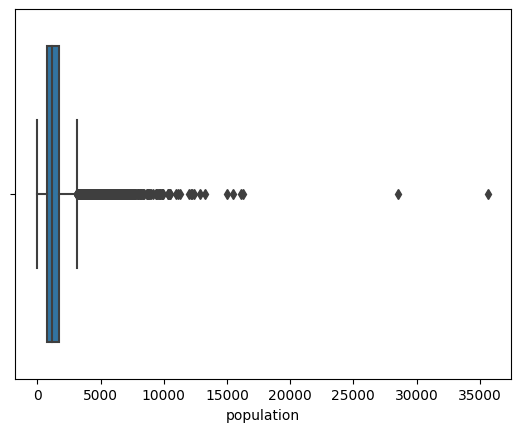

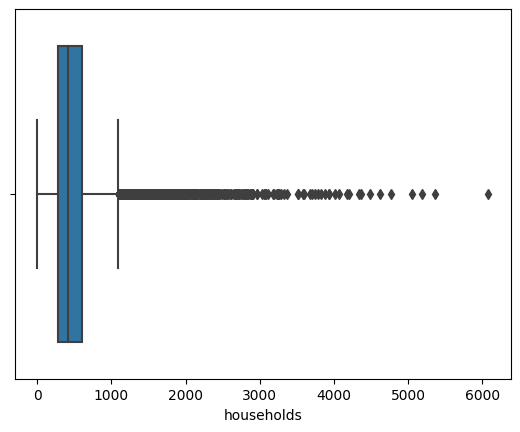

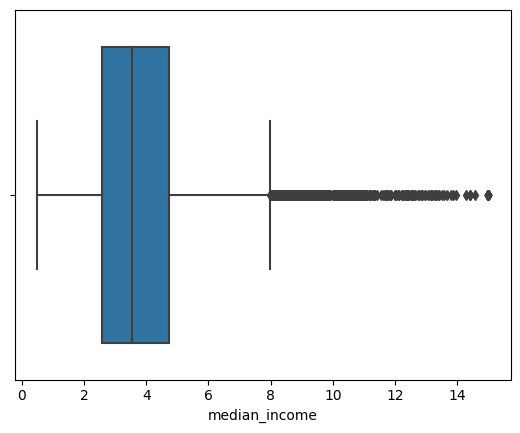

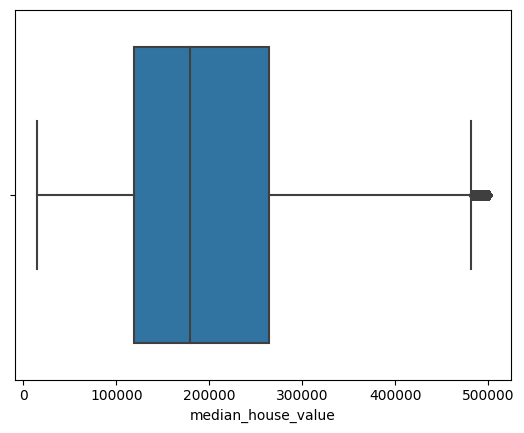

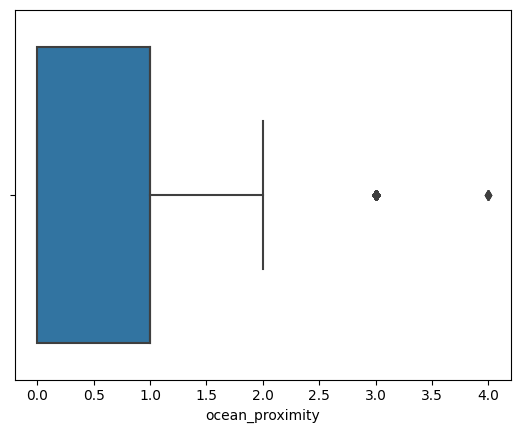

In [12]:
for features in columns:
    sns.boxplot(data=raw_data, x=features)
    plt.show()

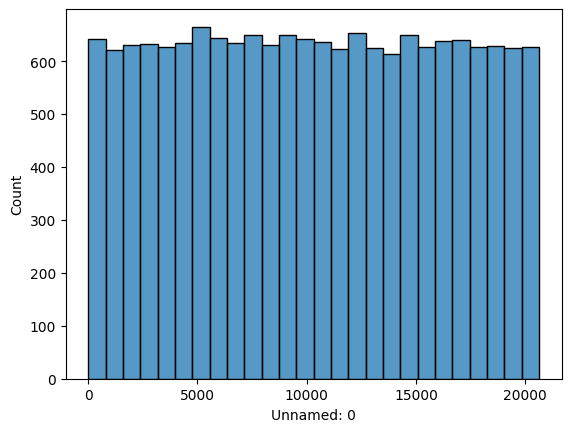

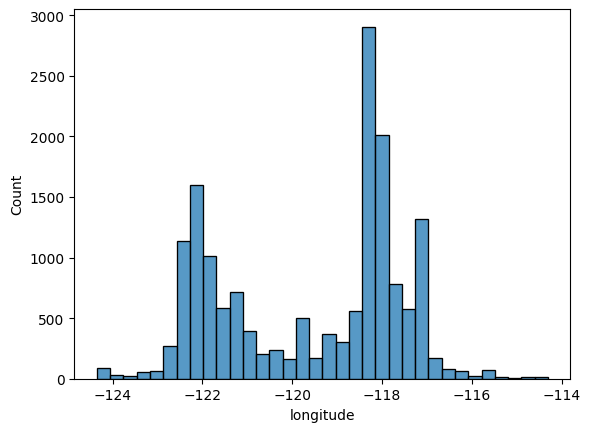

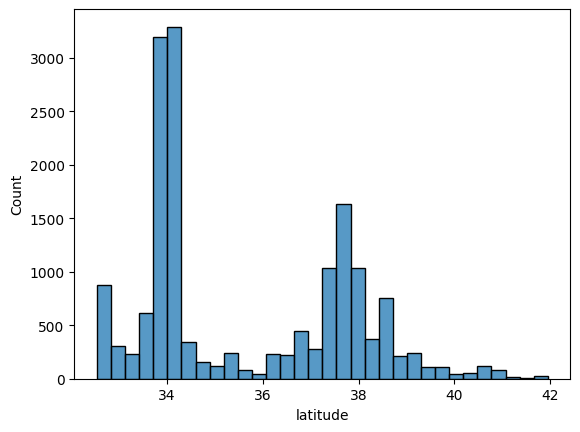

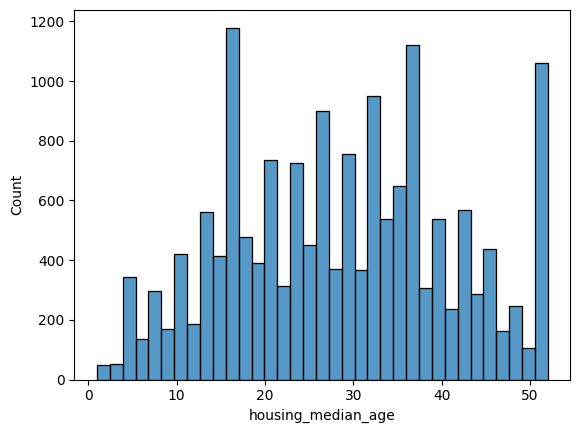

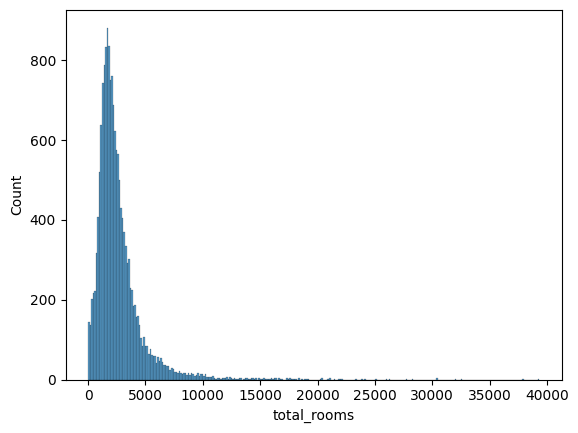

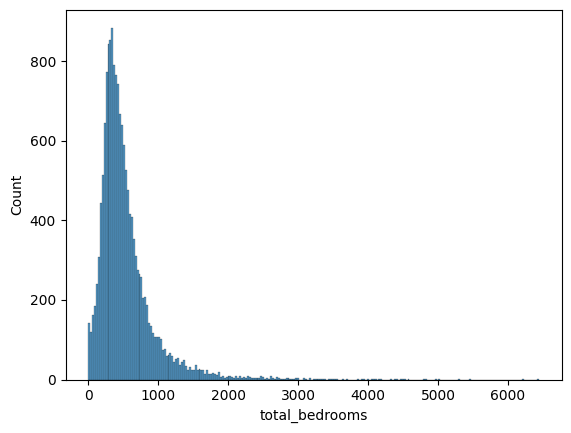

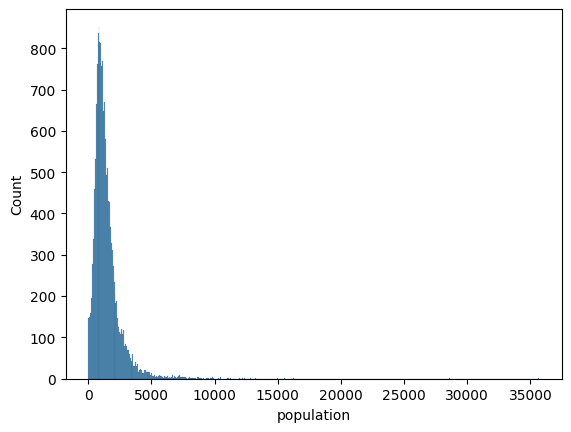

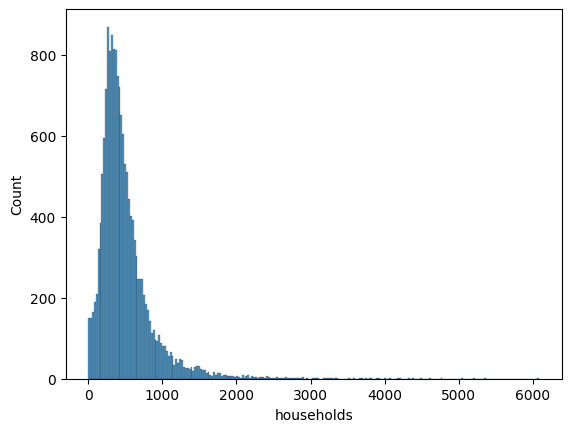

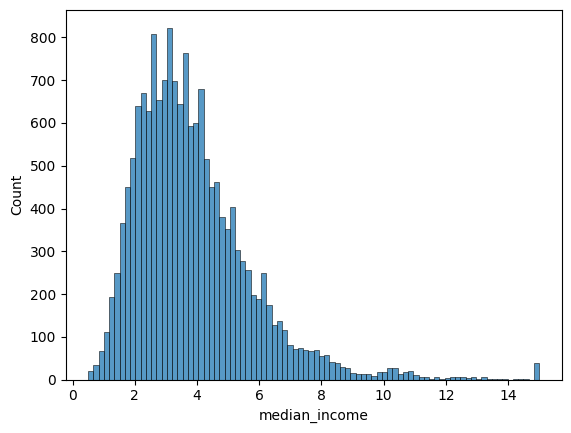

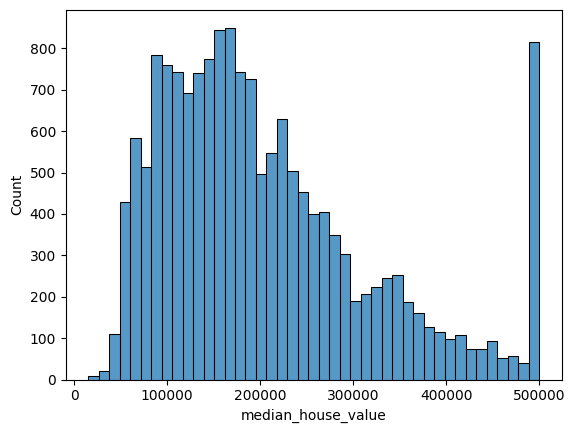

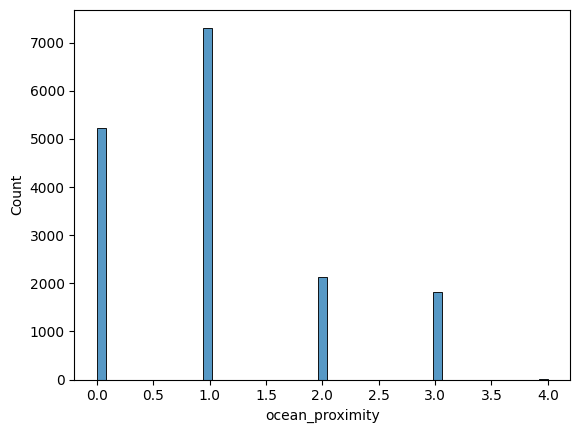

In [13]:
for features in columns:
    sns.histplot(data=raw_data, x=features)
    plt.show()

In [14]:
# Calculate the correlation matrix
corr_matrix = raw_data.corr()
corr_matrix = np.round(corr_matrix, 2)

<AxesSubplot:>

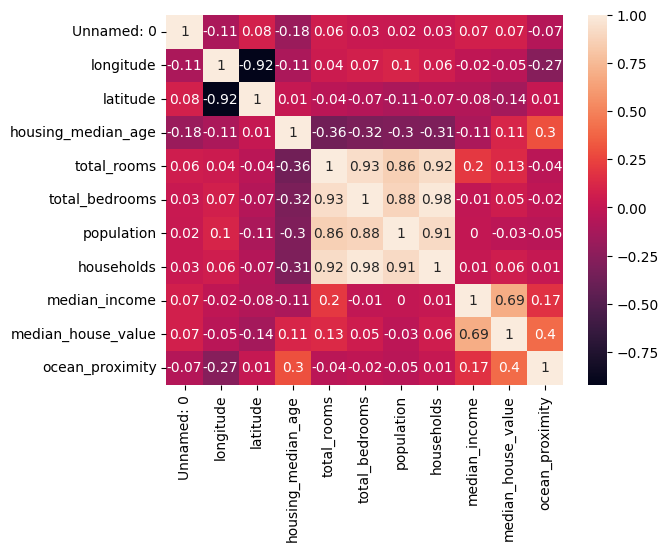

In [15]:
# Visualize the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, annot=True)

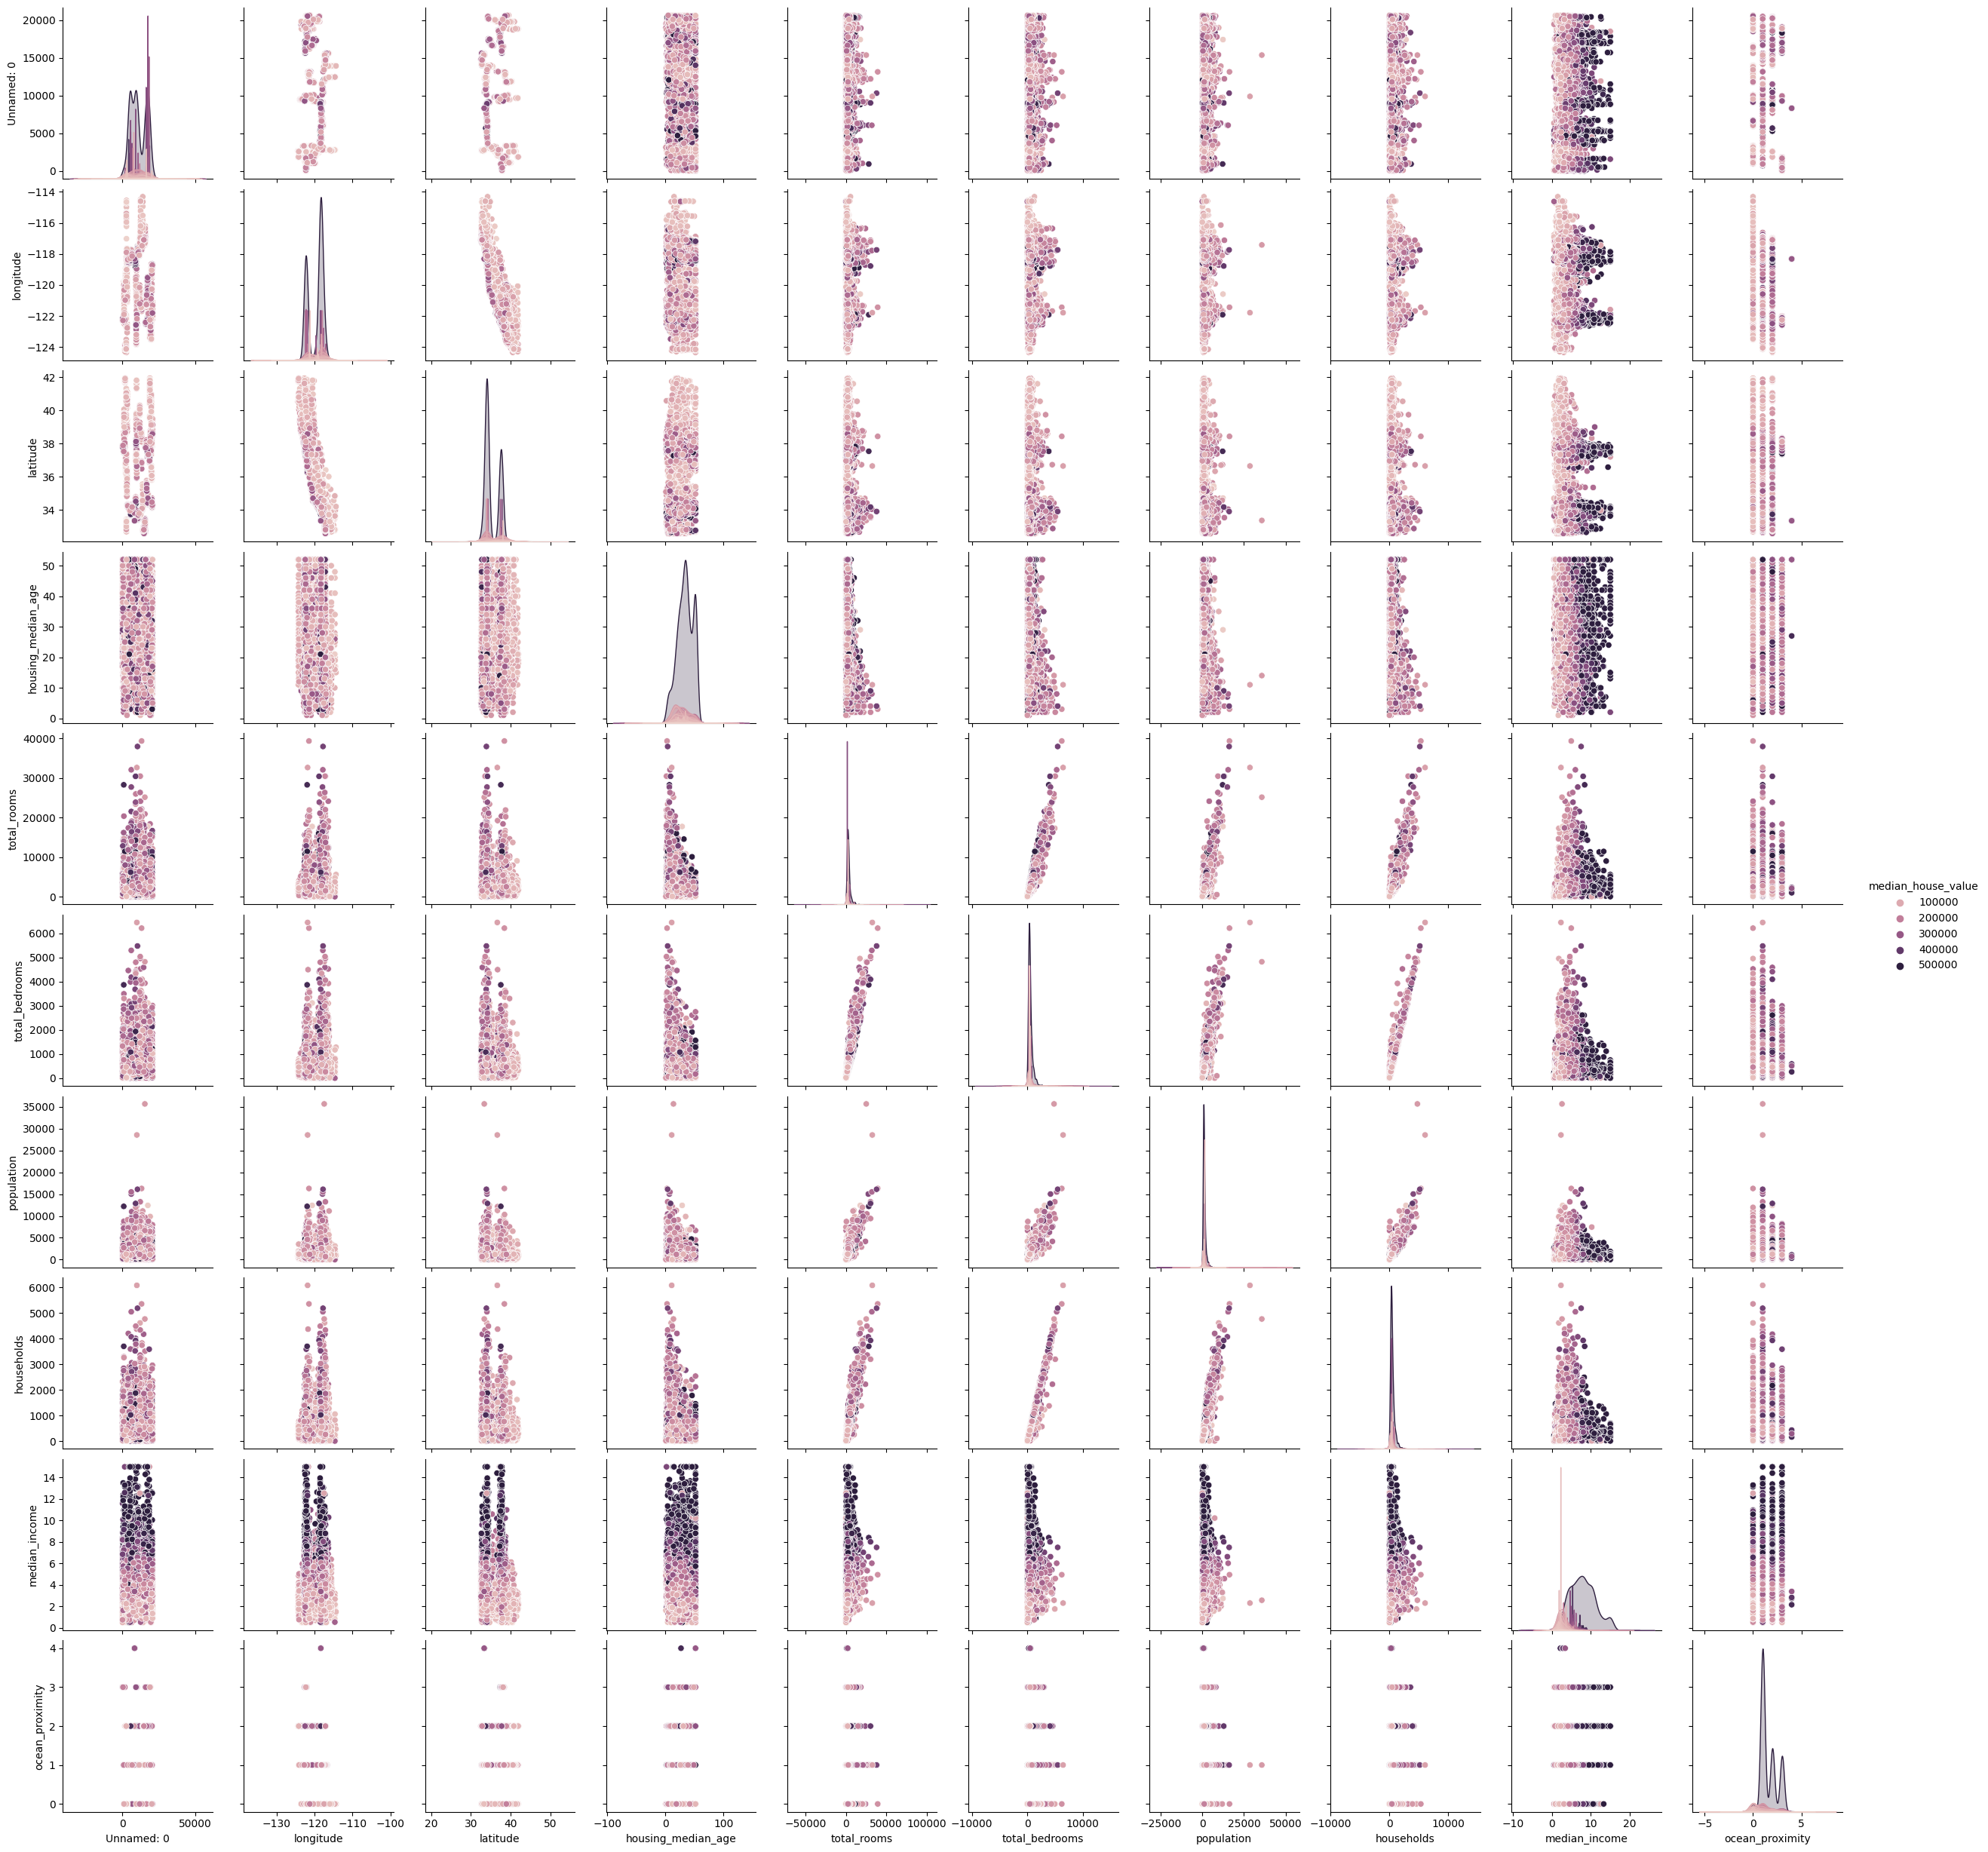

In [28]:
sns.pairplot(data=raw_data, hue = "median_house_value")

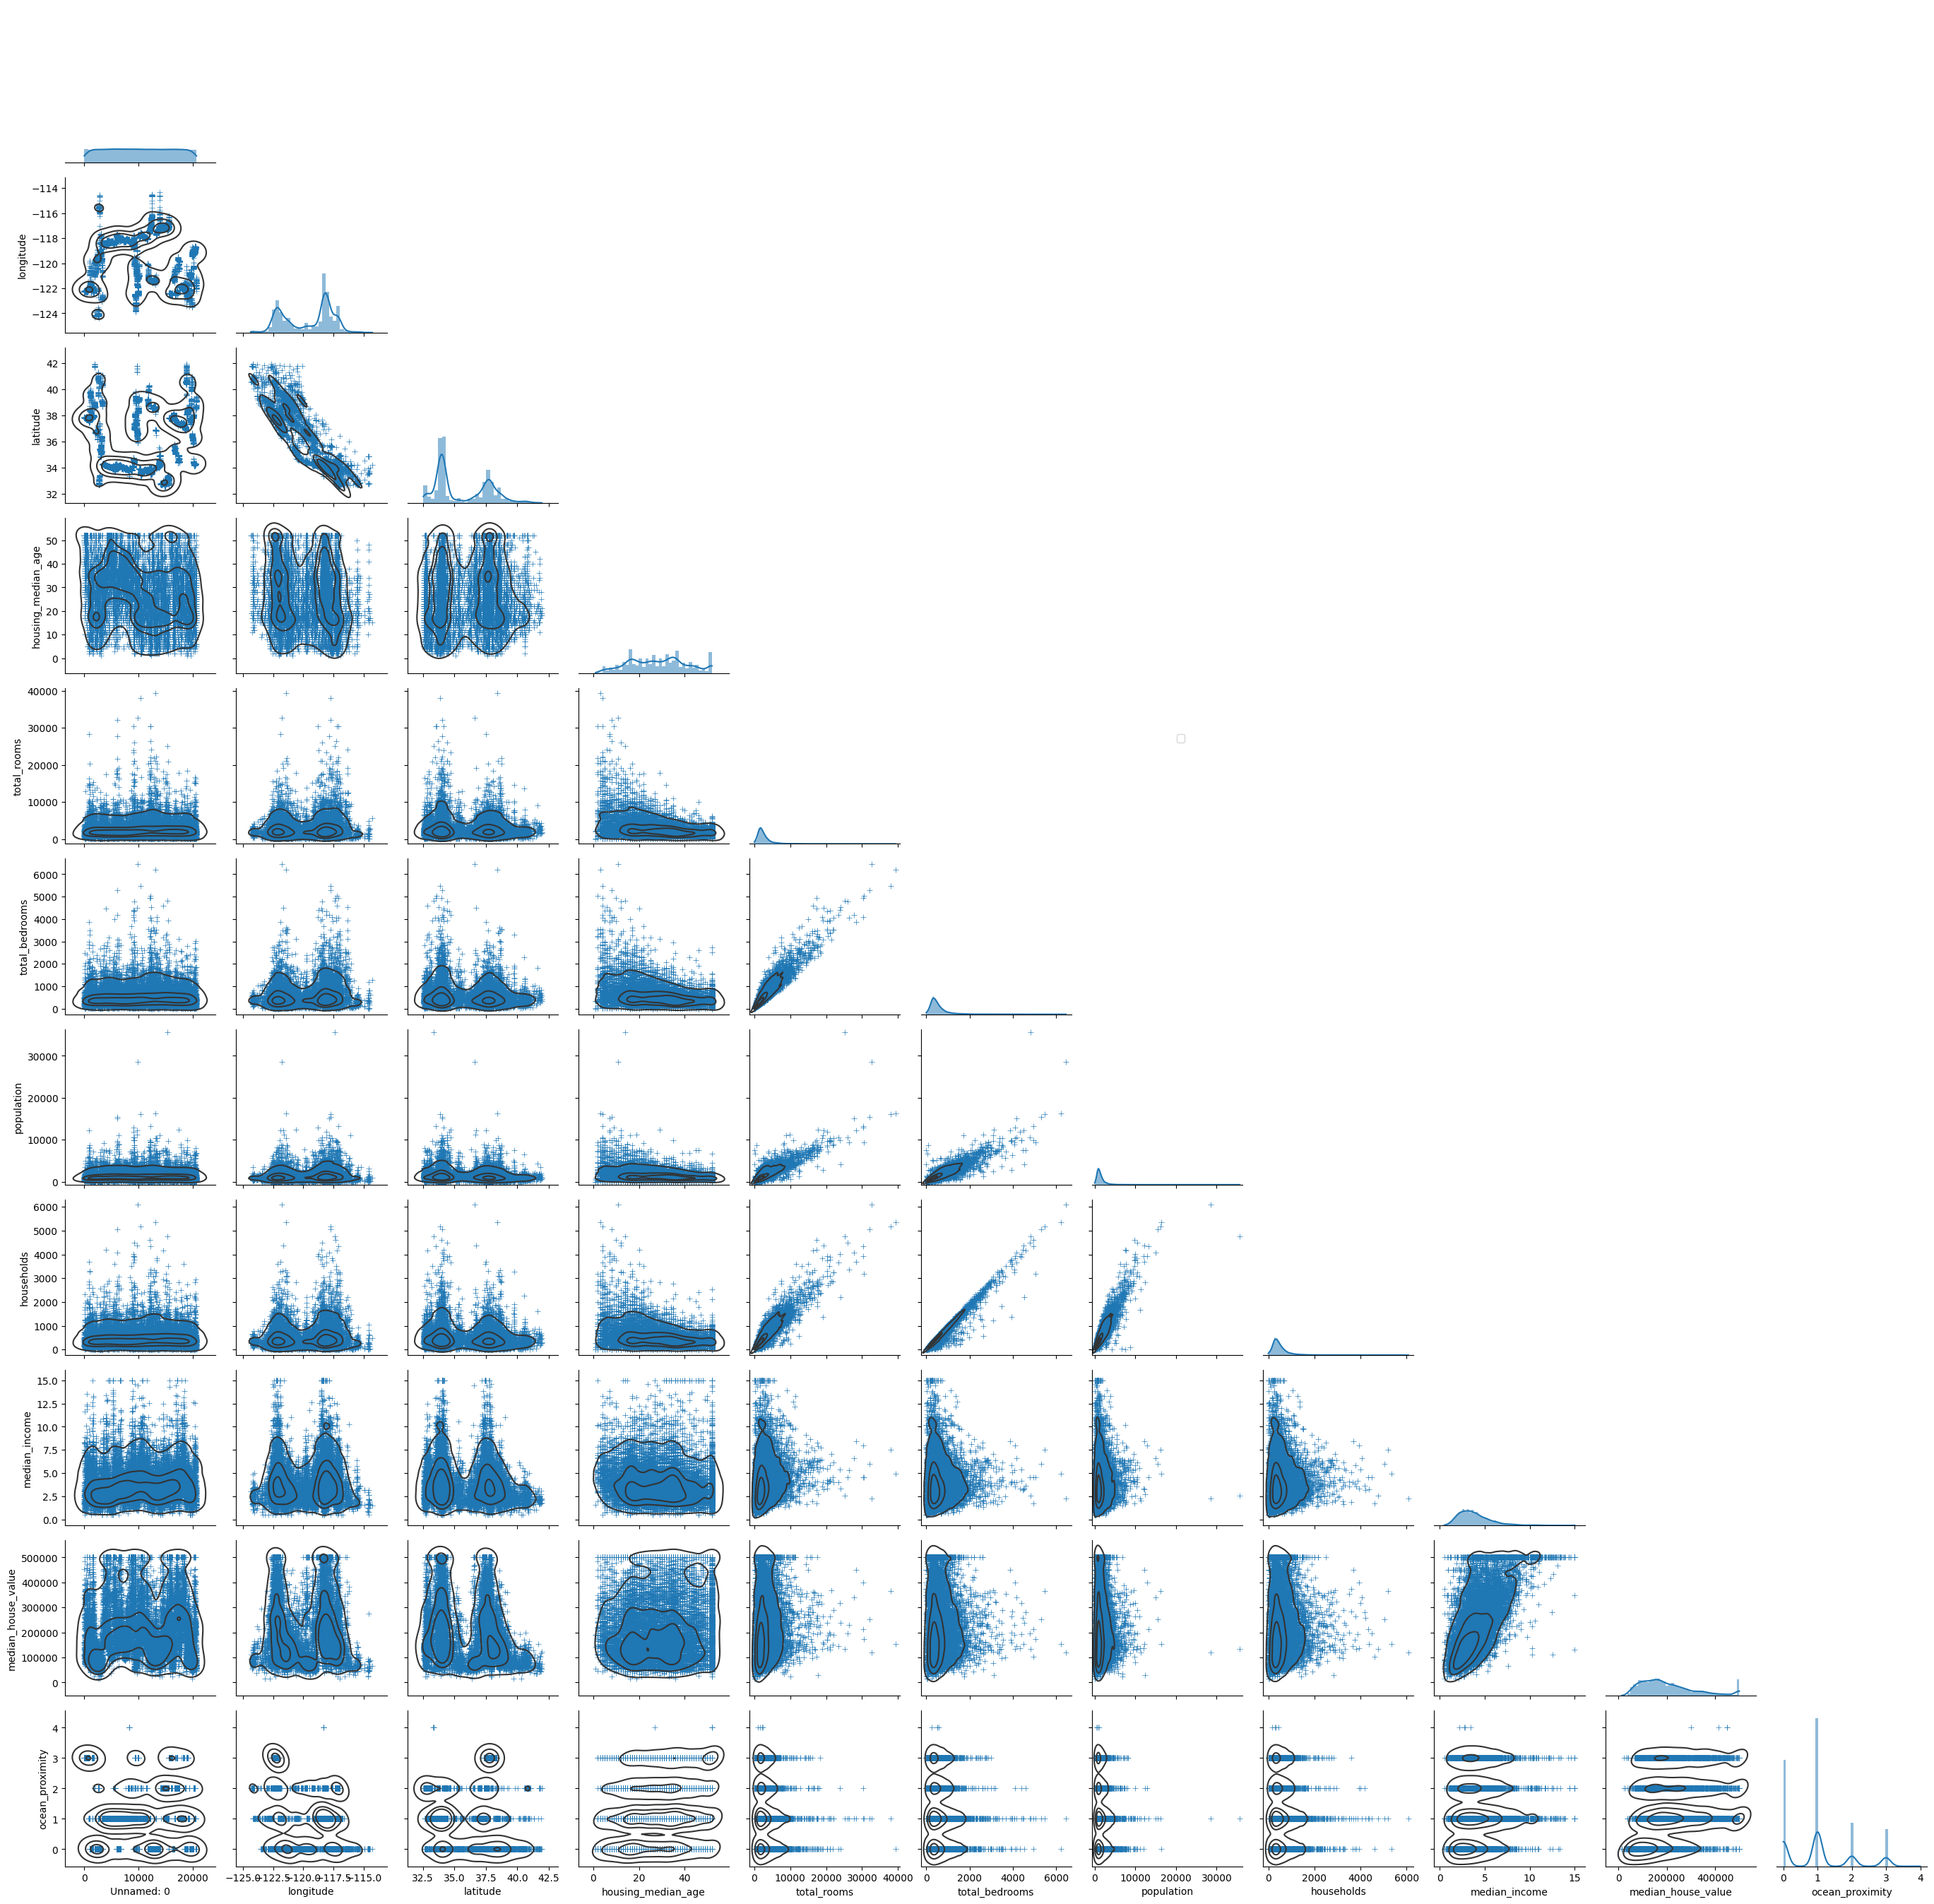

In [17]:
g = sns.PairGrid(data = raw_data,corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [18]:
y = raw_data['median_house_value']
X = raw_data.drop("median_house_value", axis=1)

# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X, y)

dummy_clf.score(X, y)

0.04620881782945736

In [19]:
Q1 = raw_data.quantile(0.25)
Q3 = raw_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0             10259.500000
longitude                  3.780000
latitude                   3.780000
housing_median_age        19.000000
total_rooms             1708.000000
total_bedrooms           351.000000
population               950.000000
households               326.000000
median_income              2.170725
median_house_value    145100.000000
ocean_proximity            1.000000
dtype: float64


In [20]:
raw_data_out = raw_data[~((raw_data < (Q1 - 1.5 * IQR)) |(raw_data > (Q3 + 1.5 * IQR))).any(axis=1)]
raw_data_out.shape

(12571, 11)

In [29]:
best_columns = columns
cols_to_remove =['total_bedrooms','longitude','latitude']
best_columns = [i for i in columns if i not in cols_to_remove]
best_columns

['Unnamed: 0',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [22]:
X = raw_data.drop(['total_bedrooms', 'median_house_value'], axis=1)

y = raw_data['median_house_value']
ols = sm.OLS(y, sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3237.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:42:52   Log-Likelihood:            -2.0747e+05
No. Observations:               16512   AIC:                         4.150e+05
Df Residuals:                   16502   BIC:                         4.150e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.605e+06   9.24e+04    -28.205      0.000   -2.79e+06   -2.42e+06
Unnamed: 0             0.7392      0.095      7.769      0.000       0.553       0.926
longitude          -3.178e+04   1054.280    -30.148      0.000   -3.39e+04   -2.97e+04
latitude           -3.357e+04    956.819    -35.087      0.000   -3.54e+04   -3.17e+04
housing_median_age  1086.5399     49.626     21.895      0.000     989.267    1183.812
total_rooms           -2.4941      0.759     -3.286      0.001      -3.982      -1.006
population           -40.3472      1.140    -35.387      0.000     -42.582     -38.112
households           146.0569      4.860     30.051      0.000     136.530     155.584
median_income       3.839e+04    352.336    108.955      0.000    3.77e+04    3.91e+04
ocean_proximity     1.126e+04    824.654     13.650      0.000    9640.447    1.29e+04
==============================================================================
Omnibus:                     4093.181   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15412.015
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       7.077   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#test normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."

for i in best_columns:
    print (shapiro_test(raw_data[i]))

The distribution departed from normality significantly, W= 0.96, P value= 0.0
The distribution departed from normality significantly, W= 0.9, P value= 0.0
The distribution departed from normality significantly, W= 0.88, P value= 0.0
The distribution departed from normality significantly, W= 0.98, P value= 0.0
The distribution departed from normality significantly, W= 0.69, P value= 0.0
The distribution departed from normality significantly, W= 0.7, P value= 0.0
The distribution departed from normality significantly, W= 0.74, P value= 0.0
The distribution departed from normality significantly, W= 0.89, P value= 0.0
The distribution departed from normality significantly, W= 0.91, P value= 0.0
The distribution departed from normality significantly, W= 0.83, P value= 0.0


/home/eliana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


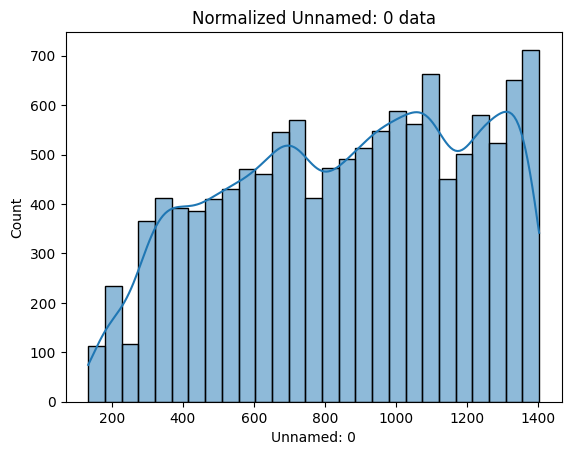

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


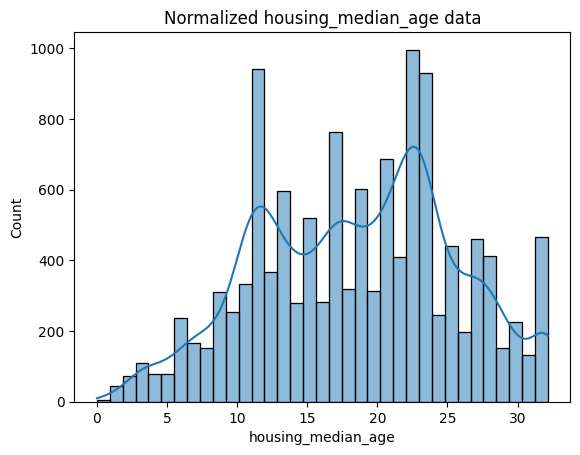

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


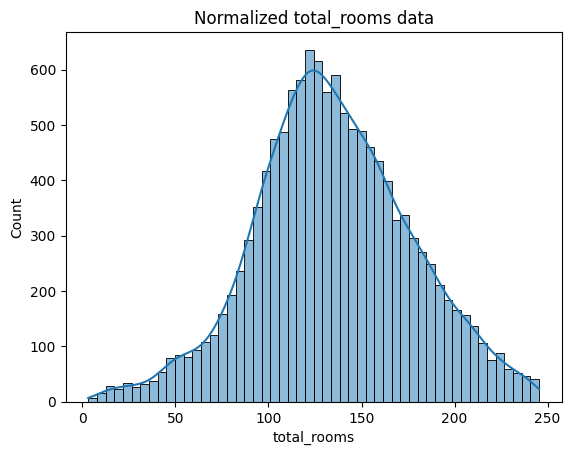

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


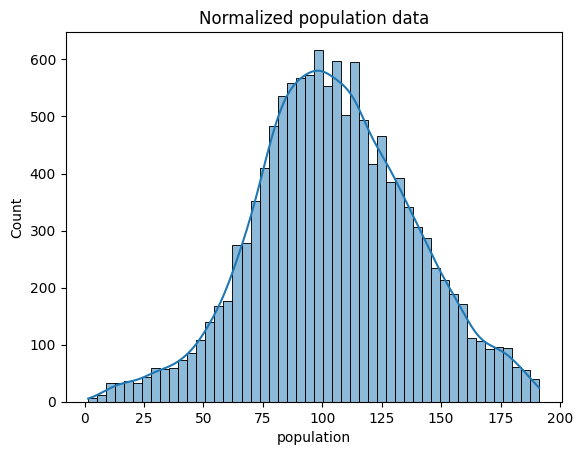

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


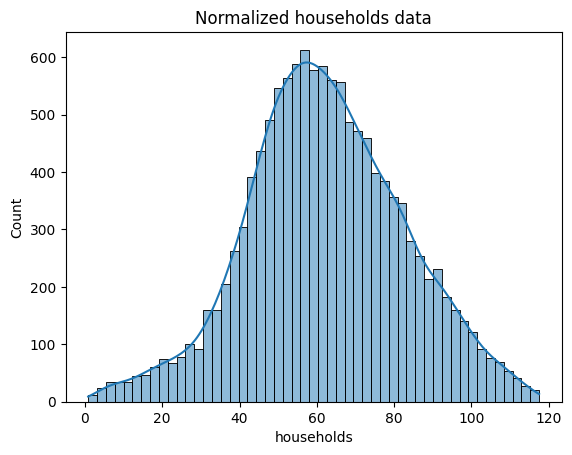

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


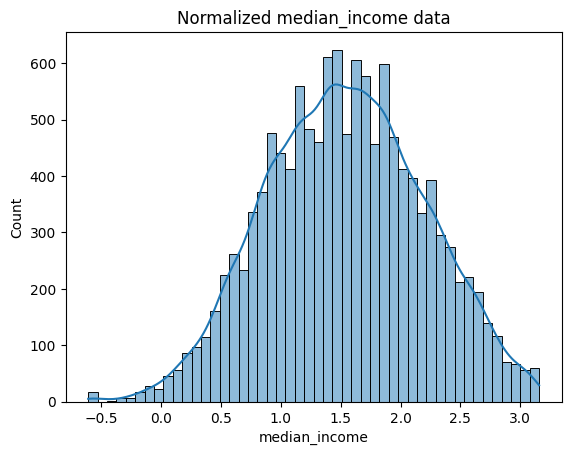

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


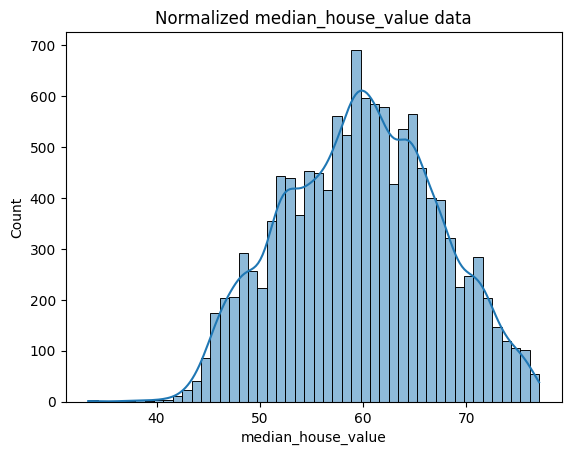

/tmp/ipykernel_20420/1036597423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_out[i]=normalized_values


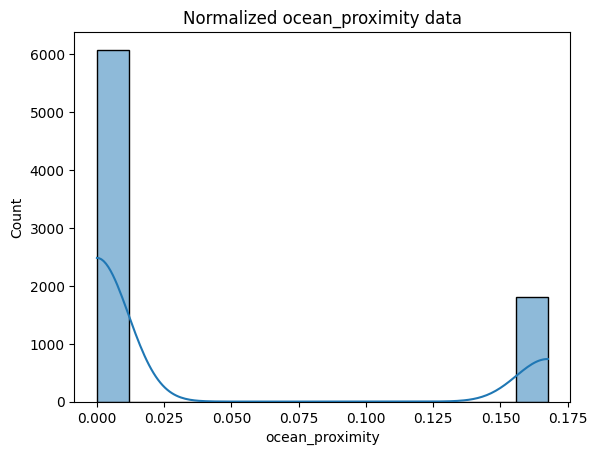

In [68]:
for i in best_columns:
    # get the index of all positive values in column (Box-Cox only takes positive values)
    index_of_positive_values = raw_data_out[i] > 0

    # get only positive values (using their indexes)
    positive_values = raw_data_out[i].loc[index_of_positive_values]
    # normalize the pledges (w/ Box-Cox)
    normalized_values = pd.Series(stats.boxcox(positive_values)[0], 
                                name=i,
                                index=positive_values.index)
    raw_data_out[i]=normalized_values
    ax = sns.histplot(normalized_values, kde=True)
    ax.set_title(f"Normalized {i} data")
    plt.show()

In [69]:
raw_data_out

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0       284.564523    -119.84     36.77            4.194747   127.968819   
1       884.396729    -117.80     33.68            5.674548   135.000410   
2       323.744958    -120.19     36.60           16.775934    82.673120   
3       471.552649    -118.32     34.10           20.355376    67.690950   
4      1204.145941    -121.23     37.79           14.315992   130.712311   
...            ...        ...       ...                 ...          ...   
16506  1109.333851    -117.09     32.79           23.255890   114.454206   
16507   182.908793    -121.90     39.59           13.690061   111.644389   
16509   952.586097    -121.22     38.92           13.059254   153.318087   
16510   639.074702    -118.14     34.16           24.965810   161.740834   
16511   331.023545    -124.13     40.80           20.355376   139.566635   

       total_bedrooms  population  households  median_income  \
0               473.0  117.729070   64.304355       0.423931   
1               349.0   88.261837   56.546046       2.849450   
2               214.0   92.420321   42.166954       0.479409   
3               229.0   70.816803   43.779861       0.460150   
4               373.0  103.751485   59.845149       1.856739   
...               ...         ...         ...            ...   
16506           266.0   76.776063   47.721335       1.863695   
16507           278.0   80.881315   46.548520       1.393416   
16509           461.0  107.857389   65.461508       2.024358   
16510           840.0  168.152715   94.638602       1.137152   
16511           462.0  110.657661   64.594837       0.947715   

       median_house_value  ocean_proximity  
0               49.089175              NaN  
1               67.523026         0.000000  
2               46.645121              NaN  
3               62.674103         0.000000  
4               55.264720              NaN  
...                   ...              ...  
16506           60.403606         0.167653  
16507           52.317456              NaN  
16509           62.116366              NaN  
16510           58.855963         0.000000  
16511           50.518474         0.167653  

[12571 rows x 11 columns]

In [70]:
for i in best_columns:
    print (shapiro_test(raw_data_out[i]))

The distribution departed from normality significantly, W= 0.96, P value= 0.0
The distribution departed from normality significantly, W= 0.98, P value= 0.0
The distribution departed from normality significantly, W= 1.0, P value= 0.0
The distribution departed from normality significantly, W= 1.0, P value= 0.0
The distribution departed from normality significantly, W= 1.0, P value= 0.0
The distribution departed from normality significantly, W= 1.0, P value= 0.0
The distribution departed from normality significantly, W= 0.99, P value= 0.0
Shapiro Wilk Test result didn't show non-normality, W= nan, P value= 1.0. There is no evidence to reject the null hypothesis of normality.


/home/eliana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
for i in best_columns:
    # get the index of all positive values in column (Box-Cox only takes positive values)
    index_of_positive_values = raw_data_out[i] > 0

    # get only positive values (using their indexes)
    positive_values = raw_data_out[i].loc[index_of_positive_values]

    # normalize the pledges (w/ Box-Cox)
    normalized_values = pd.Series(stats.boxcox(positive_values)[0], 
                                name=i,
                                index=positive_values.index)
    raw_data_out_normal = normalized_values

y = raw_data['median_house_value']
X = raw_data.drop("median_house_value", axis=1)

# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X, y)

dummy_clf.score(X, y)

0.04620881782945736

In [58]:
raw_data['housing_median_age_binned'] = pd.cut(raw_data['housing_median_age'], bins = [0,10,20,30,40,52], labels = ['[0 - 9]', '[10 - 19]', '[20 - 29]', '[30 - 39]', '[40 - 52]'])
raw_data.drop('housing_median_age', axis=1)

Unnamed: 0  longitude  latitude  total_rooms  total_bedrooms  \
0            2072    -119.84     36.77       1853.0           473.0   
1           10600    -117.80     33.68       2032.0           349.0   
2            2494    -120.19     36.60        875.0           214.0   
3            4284    -118.32     34.10        622.0           229.0   
4           16541    -121.23     37.79       1922.0           373.0   
...           ...        ...       ...          ...             ...   
16507        1099    -121.90     39.59       1465.0           278.0   
16508       18898    -122.25     38.11       2365.0           504.0   
16509       11798    -121.22     38.92       2531.0           461.0   
16510        6637    -118.14     34.16       2776.0           840.0   
16511        2575    -124.13     40.80       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

       ocean_proximity housing_median_age_binned  
0                    0                   [0 - 9]  
1                    1                   [0 - 9]  
2                    0                 [20 - 29]  
3                    1                 [30 - 39]  
4                    0                 [20 - 29]  
...                ...                       ...  
16507                0                 [10 - 19]  
16508                3                 [40 - 52]  
16509                0                 [10 - 19]  
16510                1                 [30 - 39]  
16511                2                 [30 - 39]  

[16512 rows x 11 columns]

In [74]:
X = raw_data.drop(['total_bedrooms','longitude','latitude', 'median_house_value', 'housing_median_age_binned'], axis=1)

y = raw_data['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6021270664493843

In [64]:
cross_valid = cross_validate(model, X,y, cv=10)
cross_valid['test_score'].mean()

0.6060039087862411

In [65]:
K = []
total_time = []
score = []

for k in range(2,40):
    cross_val_results = cross_validate(model, X, y, cv=k)
    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())

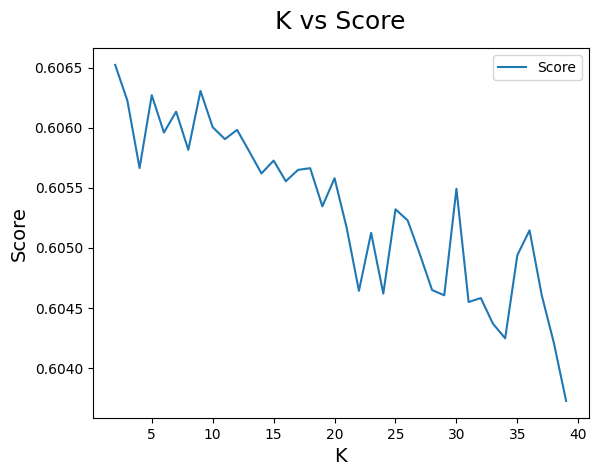

In [66]:
plt.plot(K, score, label = 'Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.title('K vs Score', fontsize = 18, y = 1.03)
plt.legend()

/home/eliana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)